<a href="https://colab.research.google.com/github/nisharathod231/Sustainable-Agriculture-Practices-Recommender/blob/main/MABwithCBRC/CropRec(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [201]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import random
import matplotlib.pyplot as plt
from scipy.stats import beta as scipy_beta
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [108]:
imported_data = pd.read_csv("/content/imported_crops.csv")
print(imported_data.head())

         Name    K_mean    N_mean    P_mean  temperature_mean  humidity_mean  \
0    Broccoli -0.395067  0.072551 -0.299363         -0.730196      -2.464421   
1        Kiwi  2.862921  1.770581  2.169387         -0.478527      -1.615034   
2  Strawberry  2.785872 -0.024274  2.111003          0.211918       0.715227   
3   Raspberry  0.101274  1.882509  0.076741         -0.042715      -0.144162   
4  Blackberry  1.407498  0.950132  1.066535         -0.302464      -1.020819   

    ph_mean  rainfall_mean  
0 -0.741455       0.391420  
1 -1.031437      -0.317673  
2  0.089651      -1.090468  
3  1.672384       1.003334  
4  1.163085      -0.754451  


In [109]:
populate_data = pd.read_csv("/content/populate_data.csv")
print(populate_data.head())

        Name    K_mean    N_mean    P_mean  temperature_mean  humidity_mean  \
0       Rice  2.589890 -0.680122 -0.739135          0.313570       1.058304   
1      Wheat  1.225176  0.390698 -0.728476          0.004340       0.014647   
2     Cotton  0.747869  0.391575 -0.717816         -0.368993      -1.245356   
3       Jute  0.037714  0.308731 -0.707157          0.019014       0.064172   
4  Sugarcane  0.568869  1.284250 -0.696498         -0.540578      -1.824458   

    ph_mean  rainfall_mean  
0  0.703327       1.395175  
1  1.799890       0.326655  
2 -0.164976       1.836870  
3 -1.308706       1.988913  
4  0.605424      -0.663376  


In [110]:
print(imported_data['Name'].nunique())
print(populate_data['Name'].nunique())

20
100


In [111]:
print(populate_data.columns)
print(imported_data.columns)

Index(['Name', 'K_mean', 'N_mean', 'P_mean', 'temperature_mean',
       'humidity_mean', 'ph_mean', 'rainfall_mean'],
      dtype='object')
Index(['Name', 'K_mean', 'N_mean', 'P_mean', 'temperature_mean',
       'humidity_mean', 'ph_mean', 'rainfall_mean'],
      dtype='object')


In [112]:
populate_data.describe()


,K_mean,N_mean,P_mean,temperature_mean,humidity_mean,ph_mean,rainfall_mean
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.090240,0.497924,-0.211497,-0.260315,-0.878566,0.117884,0.787717
std,1.084054,0.722736,0.309244,0.300374,1.013766,1.039535,1.242714
min,-0.729022,-0.889921,-0.739135,-0.730345,-2.464924,-1.524624,-1.456927
25%,0.181747,-0.061351,-0.475316,-0.535307,-1.806666,-0.856917,-0.280683
50%,1.106659,0.398021,-0.211497,-0.311253,-1.050483,0.136374,0.896405
75%,2.142594,1.018554,0.052322,-0.006812,-0.022990,0.945456,1.915044
max,2.957400,1.922667,0.316141,0.313570,1.058304,1.847680,2.588612


# Content Based

##  Item Profiling

Representing each crop as a feature vector

In [113]:
relevant_features = ['K_mean', 'N_mean', 'P_mean', 'temperature_mean',
                     'humidity_mean', 'ph_mean', 'rainfall_mean']
item_profiles = populate_data[relevant_features].to_numpy()
# print(item_profiles)
# print(item_profiles.shape)
print("5 item profiles for local crops: \n",item_profiles[:5])

5 item profiles for local crops: 
 [[ 2.58989028 -0.68012216 -0.73913515  0.31357041  1.05830394  0.70332746
   1.39517549]
 [ 1.2251759   0.39069846 -0.7284758   0.00433972  0.0146466   1.79989011
   0.32665506]
 [ 0.74786908  0.39157464 -0.71781644 -0.36899316 -1.24535639 -0.16497561
   1.8368701 ]
 [ 0.03771444  0.30873148 -0.70715709  0.0190139   0.06417213 -1.30870578
   1.98891304]
 [ 0.56886938  1.28424996 -0.69649773 -0.54057827 -1.82445824  0.60542438
  -0.66337593]]


In [114]:
relevant_features = ['K_mean', 'N_mean', 'P_mean', 'temperature_mean',
                     'humidity_mean', 'ph_mean', 'rainfall_mean']
imported_item_profiles = imported_data[relevant_features].to_numpy()
# print(item_profiles)
# print(item_profiles.shape)
print("5 item profiles for imported crops: \n",imported_item_profiles[:5])

5 item profiles for imported crops: 
 [[-0.39506682  0.07255134 -0.29936302 -0.73019627 -2.46442129 -0.74145542
   0.39141986]
 [ 2.86292149  1.77058089  2.16938702 -0.47852678 -1.61503369 -1.03143709
  -0.31767256]
 [ 2.78587231 -0.02427392  2.11100278  0.21191831  0.71522686  0.08965103
  -1.09046835]
 [ 0.10127429  1.88250871  0.07674089 -0.04271452 -0.14416202  1.672384
   1.00333417]
 [ 1.40749763  0.95013236  1.06653539 -0.30246392 -1.02081942  1.16308528
  -0.7544515 ]]


## User Profiling

In [115]:
# farmer_input = [1.2, 0.5, -0.8, 0.1, 0.9, 0.8, 1.6]
# 1.4  0.8 -0.2  0.5  0.1  0.2  2.

In [116]:
def get_user_input():
  k_mean = float(input("Enter K_mean value: "))
  n_mean = float(input("Enter N_mean value: "))
  p_mean = float(input("Enter P_mean value: "))
  temperature_mean = float(input("Enter temperature_mean value: "))
  humidity_mean = float(input("Enter humididty_mean value: "))
  ph_mean = float(input("Enter ph_mean value: "))
  rainfall_mean = float(input("Enter rainfall_mean value: "))
  print("Finding best crops for you...")
  return np.array([k_mean, n_mean, p_mean, temperature_mean, humidity_mean, ph_mean, rainfall_mean])

In [117]:
user_profile = get_user_input()
print(user_profile)

Enter K_mean value: 1.4
Enter N_mean value: 0.8
Enter P_mean value: -0.2
Enter temperature_mean value: 0.5
Enter humididty_mean value: 0.1
Enter ph_mean value: 0.2
Enter rainfall_mean value: 2.0
Finding best crops for you...
[ 1.4  0.8 -0.2  0.5  0.1  0.2  2. ]


## Similarity Measurement

Cosine similarity of 1 means the vectors are identical, 0 means they are orthogonal (no similarity), and -1 means the vectors are exactly opposite.

In [118]:
def calculate_similarities(user_profile, item_profiles):
    similarities = cosine_similarity(user_profile.reshape(1, -1), item_profiles)
    return similarities[0]

In [119]:
similarities = calculate_similarities(user_profile, item_profiles)
print(similarities)
print(similarities.shape)

[ 0.72290072  0.51495567  0.73035803  0.63265393  0.04408045  0.49030187
  0.34631991 -0.11948627  0.66106552  0.09450357  0.33650633  0.19409951
  0.82449099  0.16700313  0.77297164  0.86438123  0.3723267   0.79391084
  0.15601669  0.56590112  0.72100988  0.60234098 -0.16990495 -0.12540141
 -0.25180218  0.67196519  0.25644345  0.59214863  0.86390827  0.66202762
  0.59773167  0.15893909  0.57818525  0.17351414  0.6249141   0.60539916
  0.8014723   0.67885001  0.3293889   0.0703272   0.17744188  0.79693411
  0.26347544  0.85466077  0.33341554  0.88361987  0.68992004  0.34835968
  0.39794021  0.31531396  0.31374479  0.1557314   0.33166837  0.44935929
  0.46397655 -0.32321912  0.31495878 -0.23458844  0.37426469 -0.39281088
 -0.63468653  0.44997704  0.42279076  0.38135743  0.71683788  0.55308237
 -0.04070916  0.10515179  0.53547756  0.46958583  0.83989635  0.42596437
  0.12553183  0.88591819  0.63190957  0.4147881   0.64350399  0.44127037
  0.30768546  0.70413891  0.91765174  0.53952335  0

In [120]:
imported_similarities = calculate_similarities(user_profile, imported_item_profiles)
print(imported_similarities)
print(imported_similarities.shape)

[-0.05690146  0.31783914  0.14959678  0.55000516  0.14093677  0.58233421
  0.67822996  0.62989743  0.46423508 -0.04540304 -0.0069563   0.3945596
  0.59833137  0.56196369 -0.03195161  0.19766685 -0.11407164  0.48516548
  0.55910968 -0.36996086]
(20,)


## Recommendation Generation

In [121]:
def get_recommendations(similarities, crop_data, n_recommendations):
    top_indices = np.argsort(similarities)[::-1][:n_recommendations]
    recommended_crops = crop_data.iloc[top_indices]['Name'].to_numpy()
    return recommended_crops

In [122]:
recommendations_local = get_recommendations(similarities, populate_data, 4)
print("Recommended local crops:")
print(recommendations_local)

Recommended local crops:
['Cottonseed' 'Snake Gourd' 'Vanilla' 'Cumin']


In [123]:
recommendations_imported = get_recommendations(imported_similarities, imported_data, 1)
print("Recommended exotic crops:")
print(recommendations_imported)

Recommended exotic crops:
['Avocado']


In [124]:
recommendations = np.concatenate((recommendations_local, recommendations_imported))
print("Recommended crops:")
print(recommendations)

Recommended crops:
['Cottonseed' 'Snake Gourd' 'Vanilla' 'Cumin' 'Avocado']


# MAB

We have a system to get the top 5 recommendations from your content-based model.
Now we will get the farmer's rating for a recommended crop (e.g., on a scale of 1 to 5).

## Epsilon-Greedy

In [125]:
def recommend_crop(counts, values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(counts))  # Exploration
    else: # Exploit
        averages = np.where(counts == 0, 0, values / counts)
        return np.argmax(averages)

In [126]:
# crop_index = recommend_crop(counts, values, epsilon)
# recommended_crop = recommendations[crop_index]  # Get the actual crop name
# print("Recommended crop:", recommended_crop)

In [127]:
def get_farmer_feedback(recommendations):
    ratings = []
    for crop in recommendations:
        print(f"Recommended Crop: {crop}")
        while True:
            try:
                rating = int(input("Please rate this crop (1-5): "))
                if 1 <= rating <= 5:
                    ratings.append(rating)
                    break
                else:
                    print("Invalid rating. Please enter a number between 1 and 5.")
            except ValueError:
                print("Invalid input. Please enter a number.")
    return ratings

In [128]:
def generate_random_ratings(recommendations):
    ratings = []
    for _ in recommendations:
        rating = random.randint(1, 5)
        ratings.append(rating)
    return ratings

In [129]:
num_crops = len(recommendations)
counts = np.zeros(num_crops)
values = np.zeros(num_crops)
epsilon = 0.3

In [130]:
num_iterations = 100
num_crops = len(recommendations)
num_ratings_pool = num_iterations * num_crops
all_ratings = []
for _ in range(num_ratings_pool):
    all_ratings.append(random.randint(1, 5))

In [131]:
def update_mab(counts, values, crop_index, rating):
    counts[crop_index] += 1
    current_average = values[crop_index]
    values[crop_index] = current_average + (rating - current_average) / counts[crop_index]

In [132]:
crop_values_over_time = [[] for _ in range(len(recommendations))]
recommended_crops_over_time = []

In [133]:
rating_index = 0
for _ in range(100):
    crop_index = recommend_crop(counts, values, epsilon)
    recommended_crop = recommendations[crop_index]
    recommended_crops_over_time.append(recommended_crop)
    # ratings = get_farmer_feedback(recommendations)
    # ratings = generate_random_ratings(recommendations)
    ratings = all_ratings[rating_index]
    rating_index += 1
    update_mab(counts, values, crop_index, ratings)
    for i in range(len(recommendations)):
        crop_values_over_time[i].append(values[i])

<ipython-input-125-958cd96caca5>:5: RuntimeWarning: invalid value encountered in divide
  averages = np.where(counts == 0, 0, values / counts)


In [134]:
print("Counts:", counts)
print("Values:", values)

Counts: [17. 25. 21. 18. 19.]
Values: [2.47058824 3.44       3.         2.66666667 2.73684211]


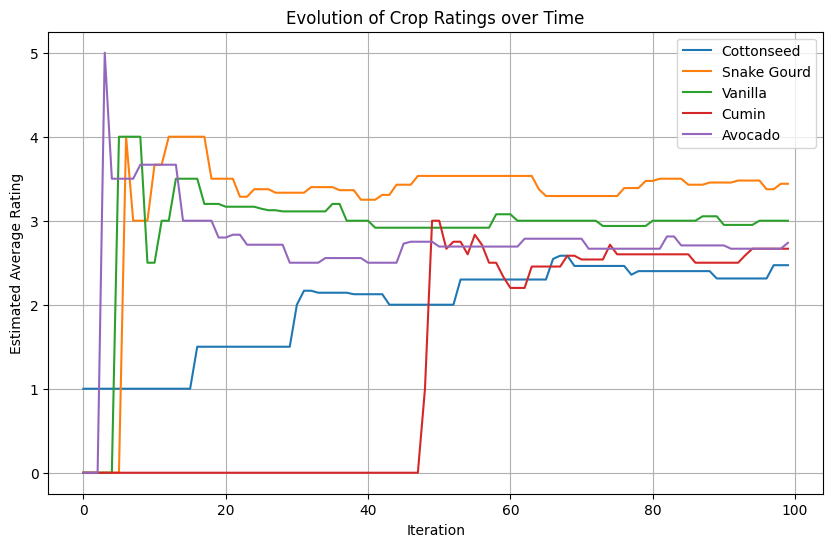

In [135]:
plt.figure(figsize=(10, 6))
for i, crop in enumerate(recommendations):
    plt.plot(crop_values_over_time[i], label=crop)
plt.xlabel("Iteration")
plt.ylabel("Estimated Average Rating")
plt.title("Evolution of Crop Ratings over Time")
plt.legend()
plt.grid(True)
plt.show()

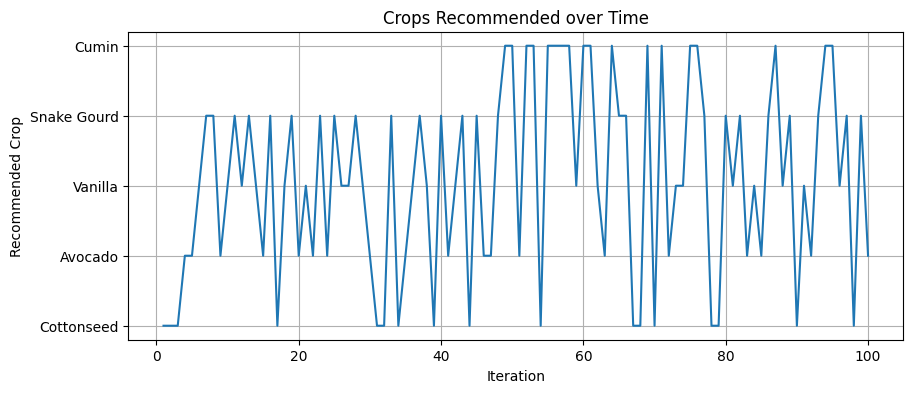

In [136]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 101), recommended_crops_over_time)
plt.xlabel("Iteration")
plt.ylabel("Recommended Crop")
plt.title("Crops Recommended over Time")
plt.grid(True)
plt.show()

 At the beginning, the algorithm had no knowledge of the farmer's preferences among the crops. Epsilon-Greedy allowed it to intelligently explore different crops. As the farmer provided ratings, Epsilon-Greedy used this feedback to update its understanding of which crops are preferred. A crop that seemed less appealing initially might become significantly better due to factors you didn't consider in the content-based system (e.g., seasonal changes, improvement in a crop variety).

  Content-based system is likely great for an initial set of recommendations but might not fully capture evolving farmer preferences or changes in crop quality. Epsilon-Greedy adds a layer of adaptability on top of this. The algorithm automatically learns which crops to prioritize over time. We don't need to manually tweak our recommendation system if a farmer's preferences change.

### Effect of changing the epsilon value

In [137]:
epsilon_values = [0.1, 0.3, 0.5]
num_iterations = 100
exploration_metrics = []

In [138]:
recommended_crops_over_time = []

**Unique Crops Recommended:** Higher unique crop counts (number of unique crops recommended over the iterations.) indicate more exploration.

In [139]:
ratings = []
for epsilon in epsilon_values:
  for _ in range(100):
    crop_index = recommend_crop(counts, values, epsilon)
    recommended_crop = recommendations[crop_index]
    recommended_crops_over_time.append(recommended_crop)
    # ratings = get_farmer_feedback(recommendations)
    ratings = generate_random_ratings(recommendations)
    update_mab(counts, values, crop_index, ratings[crop_index])
    for i in range(len(recommendations)):
        crop_values_over_time[i].append(values[i])
  unique_crops_recommended = len(set(recommended_crops_over_time))
  exploration_metrics.append(unique_crops_recommended)
  recommended_crops_over_time = []
  print(ratings)

[4, 1, 5, 5, 4]
[3, 5, 3, 3, 2]
[2, 1, 1, 5, 3]


With higher epsilon, we see more diverse recommendations and a more even distribution among recommended crops. Lower epsilon leads to the algorithm favoring a particular crop (or a small set) more often.

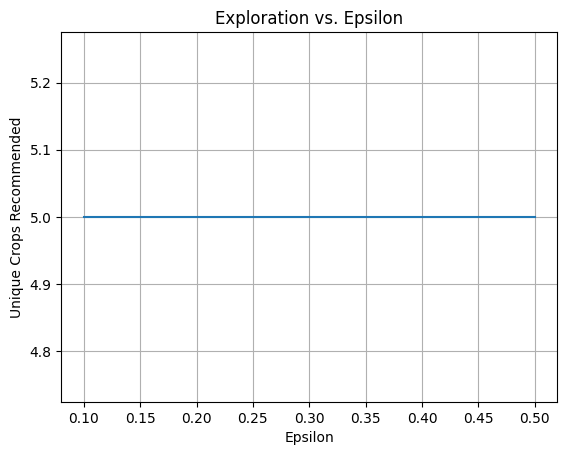

In [140]:
plt.plot(epsilon_values, exploration_metrics)
plt.xlabel("Epsilon")
plt.ylabel("Unique Crops Recommended")
plt.title("Exploration vs. Epsilon")
plt.grid(True)
plt.show()

In [141]:
num_runs = 10
all_exploration_metrics = []
crop_values_over_time = [[] for _ in range(len(recommendations))]
recommended_crops_over_time = []
num_crops = len(recommendations)
counts = np.zeros(num_crops)
values = np.zeros(num_crops)

for _ in range(num_runs):
    exploration_metrics = []
    for epsilon in epsilon_values:
        for _ in range(100):
          crop_index = recommend_crop(counts, values, epsilon)
          recommended_crop = recommendations[crop_index]
          recommended_crops_over_time.append(recommended_crop)
          # ratings = get_farmer_feedback(recommendations)
          ratings = generate_random_ratings(recommendations)
          update_mab(counts, values, crop_index, ratings[crop_index])
          for i in range(len(recommendations)):
              crop_values_over_time[i].append(values[i])
        unique_crops_recommended = len(set(recommended_crops_over_time))
        exploration_metrics.append(unique_crops_recommended)
        recommended_crops_over_time = []

    all_exploration_metrics.append(exploration_metrics)

<ipython-input-125-958cd96caca5>:5: RuntimeWarning: invalid value encountered in divide
  averages = np.where(counts == 0, 0, values / counts)


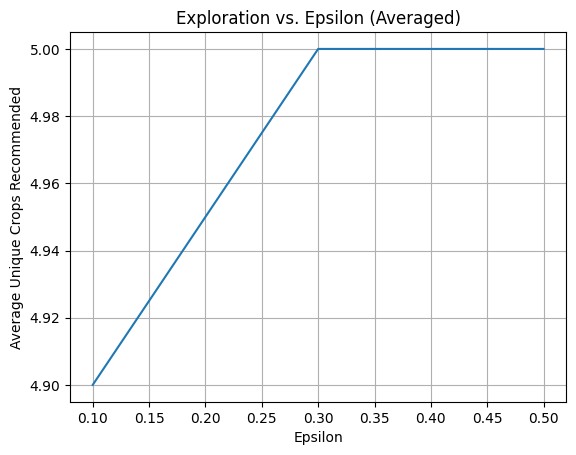

In [142]:
average_exploration_metrics = []
for i in range(len(epsilon_values)):
    values_for_epsilon = [run[i] for run in all_exploration_metrics]
    average = sum(values_for_epsilon) / len(values_for_epsilon)
    average_exploration_metrics.append(average)

plt.plot(epsilon_values, average_exploration_metrics)
plt.xlabel("Epsilon")
plt.ylabel("Average Unique Crops Recommended")
plt.title("Exploration vs. Epsilon (Averaged)")
plt.grid(True)
plt.show()

**Recommendation Diversity:** Calculating the percentage of times each crop was recommended. If recommendations are highly concentrated on one crop, exploration is lower.

In [143]:
recommendation_data = {}  # to store percentages by epsilon

In [144]:
for epsilon in epsilon_values:
    recommended_crops_over_time = []
    crop_counts = {}
    for _ in range(num_iterations):
        crop_index = recommend_crop(counts, values, epsilon)
        recommended_crop = recommendations[crop_index]
        recommended_crops_over_time.append(recommended_crop)

        crop_counts[recommended_crop] = crop_counts.get(recommended_crop, 0) + 1

        ratings = generate_random_ratings(recommendations)
        update_mab(counts, values, crop_index, ratings[crop_index])

        for i in range(len(recommendations)):
            crop_values_over_time[i].append(values[i])

    total_recommendations = num_iterations
    for crop, count in crop_counts.items():
        percent_recommended = (count / total_recommendations) * 100
        crop_counts[crop] = percent_recommended

    recommendation_data[epsilon] = crop_counts
    recommended_crops_over_time = []

With lower Epsilon we might see more evenly distributed recommendation percentages across crops within a group. With higher Epsilon might see some crops with higher recommendation percentages within a group, while others have lower percentages.

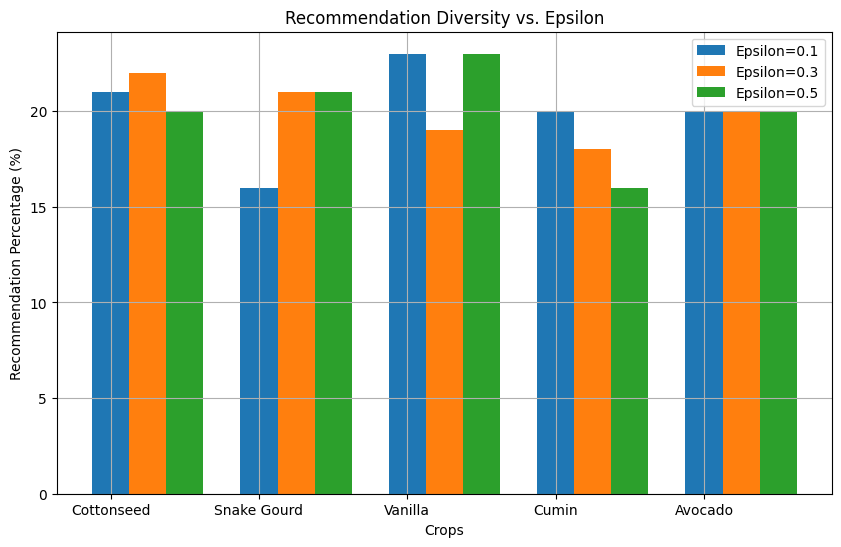

In [145]:
plt.figure(figsize=(10, 6))

x_axis_labels = recommendations
bar_width = 0.25
offset = 0

for i, (epsilon, data) in enumerate(recommendation_data.items()):
    x = [index + offset for index in range(len(x_axis_labels))]
    plt.bar(x, data.values(),  width=bar_width, label=f'Epsilon={epsilon}')
    offset += bar_width

plt.xticks(range(len(x_axis_labels)), x_axis_labels)
plt.xlabel("Crops")
plt.ylabel("Recommendation Percentage (%)")
plt.title("Recommendation Diversity vs. Epsilon")
plt.legend()
plt.grid(True)
plt.show()

### Regret Analysis

To know which crop is truly the best one based on its absolute average reward we will run many iterations of the algorithm with no exploration (epsilon = 0) to estimate the best crop.

In [185]:
num_crops = len(recommendations)
counts = np.zeros(num_crops)
values = np.zeros(num_crops)
epsilon = 0

In [186]:
crop_values_over_time = [[] for _ in range(len(recommendations))]
recommended_crops_over_time = []

In [187]:
for _ in range(100):
    crop_index = recommend_crop(counts, values, epsilon)
    recommended_crop = recommendations[crop_index]
    recommended_crops_over_time.append(recommended_crop)
    crop_counts[recommended_crop] = crop_counts.get(recommended_crop, 0) + 1
    # ratings = get_farmer_feedback(recommendations)
    ratings = generate_random_ratings(recommendations)
    update_mab(counts, values, crop_index, ratings[crop_index])
    for i in range(len(recommendations)):
        crop_values_over_time[i].append(values[i])

<ipython-input-125-958cd96caca5>:5: RuntimeWarning: invalid value encountered in divide
  averages = np.where(counts == 0, 0, values / counts)


In [188]:
best_crop_index = np.argmax(values)
best_crop = recommendations[best_crop_index]
print("Estimated Best Crop:", best_crop)

Estimated Best Crop: Cottonseed


In [150]:
def calculate_regret(counts, values, recommendations, best_crop):
    best_crop_index = np.where(recommendations == best_crop)[0][0]
    best_crop_value = values[best_crop_index]
    recommended_crop_index = crop_index
    recommended_crop_value = values[recommended_crop_index]
    return best_crop_value - recommended_crop_value

In [151]:
epsilon = 0.1
total_regret = 0

In [152]:
for _ in range(num_iterations):
    crop_index = recommend_crop(counts, values, epsilon)
    recommended_crop = recommendations[crop_index]
    recommended_crops_over_time.append(recommended_crop)
    # ratings = get_farmer_feedback(recommendations)
    ratings = generate_random_ratings(recommendations)
    update_mab(counts, values, crop_index, ratings[crop_index])
    for i in range(len(recommendations)):
        crop_values_over_time[i].append(values[i])
    regret = calculate_regret(counts, values, recommendations, 'Cottonseed')
    total_regret += regret

print("Total Regret:", total_regret)

Total Regret: 9.918390455122404


<ipython-input-125-958cd96caca5>:5: RuntimeWarning: invalid value encountered in divide
  averages = np.where(counts == 0, 0, values / counts)


this might be negative because we are giving ratings randomly, so the true best crop we found might not be actually the best

## Thompson Sampling
It is a Bayesian approach to the multi-armed bandit problem. Instead of directly keeping track of average rewards, it models belief about each crop's reward with a probability distribution. In each iteration, it does the following:

**Sample**: For each crop, it draws a random sample from its reward distribution.

**Select**: It chooses the crop with the highest sampled reward.

**Update**: It updates the reward distribution based on the feedback received.

In [179]:
num_crops = len(recommendations)
alpha = np.ones(num_crops)
beta_params = np.ones(num_crops)
num_iterations = 100

In [154]:
print(alpha.dtype)
print(beta_params.dtype)

float64
float64


In [180]:
rating_history = []
alpha_history = []
beta_history = []
recommended_crops_over_time = []
rating_index  = 0
total_regret = 0
regret_history = []

for _ in range(num_iterations):
    samples = np.zeros(num_crops)
    for i in range(num_crops):
        distribution = scipy_beta(float(alpha[i].item()), float(beta_params[i].item()))
        samples[i] = distribution.rvs()

    crop_index = np.argmax(samples)
    recommended_crop = recommendations[crop_index]
    # recommended_crops_over_time.append(recommended_crop)

    # rating = generate_random_ratings(recommendations)[crop_index]
    rating = all_ratings[rating_index]
    rating_index += 1
    if rating >= 3:
        alpha[crop_index] += 1
    else:
        beta_params[crop_index] += 1
    rating_history.append(rating)
    if (i) % 2 == 0:
        alpha_history.append(alpha.copy())
        beta_history.append(beta_params.copy())
        recommended_crops_over_time.append(recommended_crop)
    best_crop_value = values[best_crop_index]
    recommended_crop_value = values[crop_index]  # Assuming 'crop_index' is from TS
    regret = best_crop_value - recommended_crop_value
    total_regret += regret
    regret_history.append(regret)

In [181]:
print("Alpha: ",alpha_history)
print("Beta: ",beta_history)

Alpha:  [array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.]), array([2., 1., 1., 1., 1.]), array([2., 1., 1., 1., 1.]), array([2., 2., 1., 1., 1.]), array([2., 3., 1., 1., 1.]), array([2., 3., 1., 1., 1.]), array([3., 3., 1., 1., 1.]), array([3., 3., 1., 1., 1.]), array([3., 3., 2., 1., 1.]), array([3., 4., 2., 1., 1.]), array([4., 4., 2., 1., 1.]), array([4., 5., 2., 1., 1.]), array([4., 5., 2., 1., 1.]), array([4., 5., 3., 1., 1.]), array([4., 5., 3., 1., 2.]), array([4., 5., 3., 1., 2.]), array([4., 5., 3., 1., 2.]), array([4., 5., 3., 1., 2.]), array([4., 5., 3., 1., 3.]), array([4., 5., 4., 1., 3.]), array([4., 5., 4., 1., 3.]), array([4., 5., 4., 1., 3.]), array([4., 5., 4., 1., 4.]), array([5., 5., 4., 1., 4.]), array([5., 6., 4., 1., 4.]), array([5., 6., 5., 1., 4.]), array([5., 6., 5., 1., 5.]), array([5., 6., 5., 1., 5.]), array([6., 6., 5., 1., 5.]), array([6., 6., 6., 1., 5.]), array([6., 7., 6., 1., 5.]), array([6., 7., 6., 1., 5.]), array

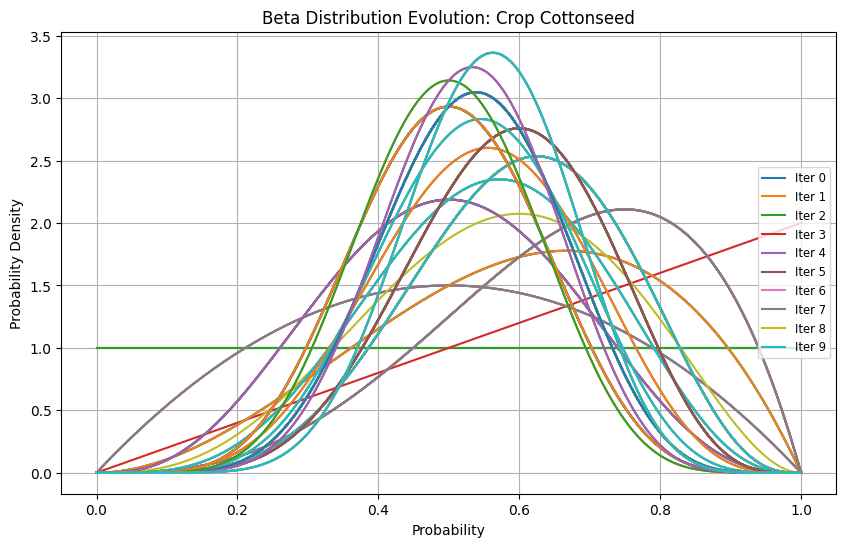

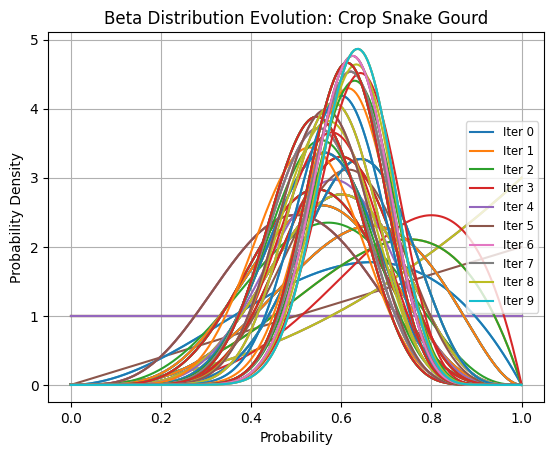

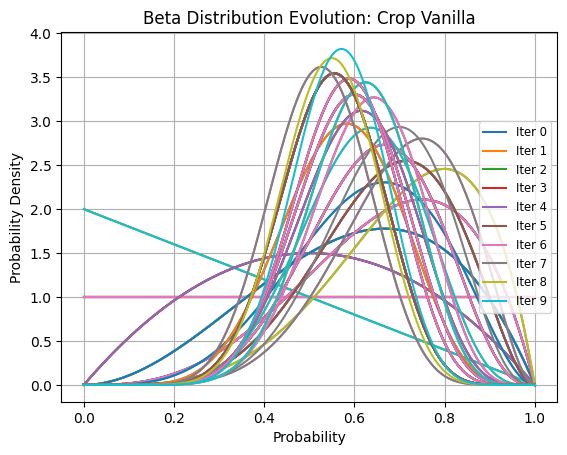

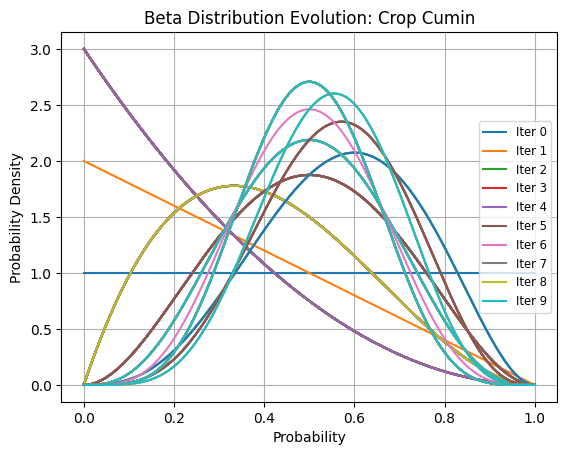

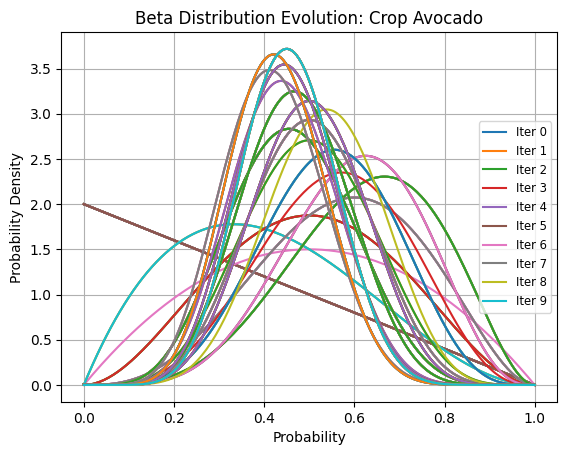

In [198]:
num_snapshots = len(alpha_history)  # Number of times you stored alpha/beta

plt.figure(figsize=(10, 6))

for crop_index in range(num_crops):
    x = np.linspace(0, 1, 200)  # Range of probability values for plotting

    for snapshot_index in range(num_snapshots):
        alpha_value = alpha_history[snapshot_index][crop_index]
        beta_value = beta_history[snapshot_index][crop_index]
        distribution = scipy_beta(alpha_value, beta_value)
        y = distribution.pdf(x)  # Get probability density

        if snapshot_index < 10:  # Add label only for the first 10
            plt.plot(x, y, label=f"Iter {snapshot_index}")
        else:
            plt.plot(x, y)

    plt.xlabel("Probability")
    plt.ylabel("Probability Density")
    plt.title(f"Beta Distribution Evolution: Crop {recommendations[crop_index]}")
    plt.legend(fontsize='small', loc='right', ncol=1)
    plt.grid(True)
    plt.show()

**Interpretations**

**Early Iterations:** Initially, the distributions might be relatively flat or have multiple peaks, indicating uncertainty about the crop's potential reward.

**Later Iterations:** As Thompson Sampling gathers more information, you should ideally see the distributions becoming:

  

*   Narrower: This indicates increasing confidence in the estimated range of rewards for a crop.
*   Shifting: The peak of the distribution should shift towards higher probabilities if the crop is performing well, and towards lower probabilities if it's not.



  

### Recommendations with iterations

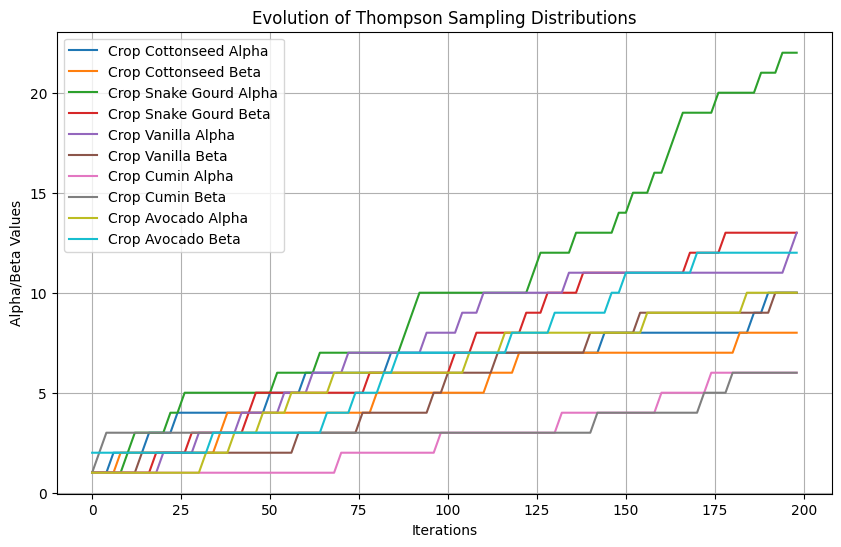

In [182]:
num_crops = len(recommendations)
iterations_per_snapshot = 2
plt.figure(figsize=(10, 6))

for crop_index in range(num_crops):
    alpha_values = [snapshot[crop_index] for snapshot in alpha_history]
    beta_values = [snapshot[crop_index] for snapshot in beta_history]

    x_axis = range(
        0, iterations_per_snapshot * len(alpha_history), iterations_per_snapshot
    )

    plt.plot(x_axis, alpha_values, label=f"Crop {recommendations[crop_index]} Alpha")
    plt.plot(x_axis, beta_values, label=f"Crop {recommendations[crop_index]} Beta")

plt.xlabel("Iterations")
plt.ylabel("Alpha/Beta Values")
plt.title("Evolution of Thompson Sampling Distributions")
plt.legend()
plt.grid(True)
plt.show()

**Interpreting the Plot**

**Ideal Outcome:** For the crop(s) that Thompson Sampling believes are best, the alpha values increasing over time, while the beta values remain relatively lower or decrease.

**Exploration:** If there are periods where the alpha and beta values for multiple crops are close together, it indicates a phase of exploration.

**Convergence:** When the lines start to stabilize, it suggests Thompson Sampling is becoming more confident in its choices

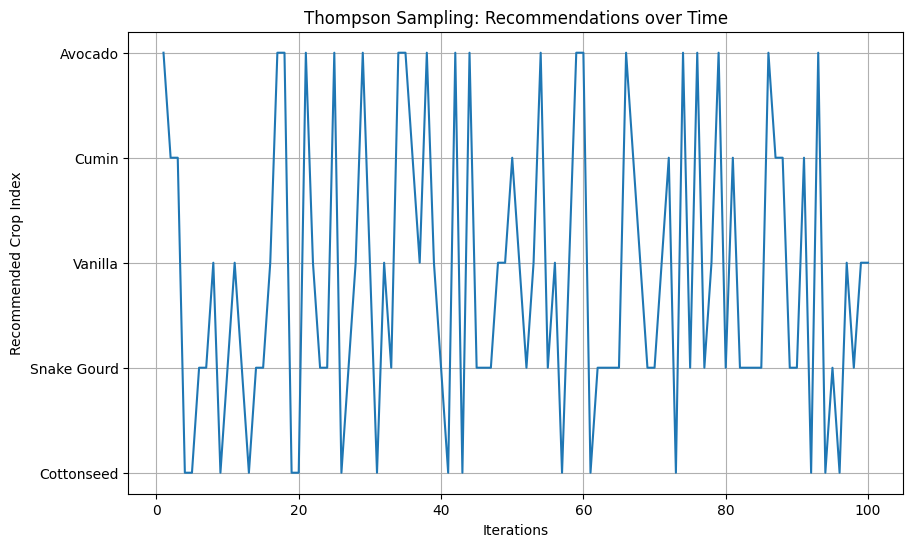

In [183]:
iterations = list(range(1, num_iterations + 1))
recommended_crops_history = recommended_crops_over_time.copy()

crop_to_index = {crop: i for i, crop in enumerate(recommendations)}
recommended_crops_indices = [crop_to_index[crop] for crop in recommended_crops_history]

plt.figure(figsize=(10, 6))
plt.plot(iterations, recommended_crops_indices)

plt.xlabel("Iterations")
plt.ylabel("Recommended Crop Index")
plt.title("Thompson Sampling: Recommendations over Time")

plt.yticks(range(len(recommendations)), recommendations)
plt.grid(True)
plt.show()

### Regret Analysis

Total Regret: 35.03667895592409


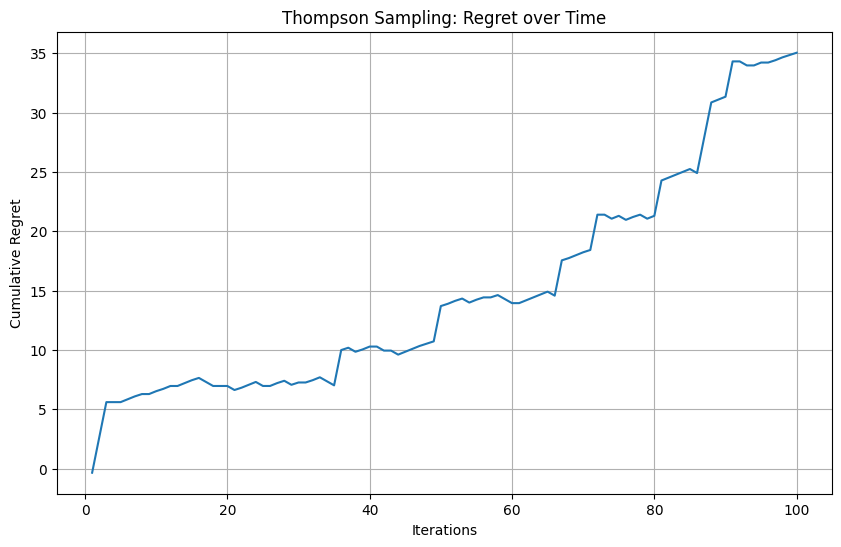

In [184]:
print("Total Regret:", total_regret)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), np.cumsum(regret_history))
plt.xlabel("Iterations")
plt.ylabel("Cumulative Regret")
plt.title("Thompson Sampling: Regret over Time")
plt.grid(True)
plt.show()